# CHAPTER 4: FEATURES SELECTION & PREPROCESSING

***"Tools sharpen the blade, but it’s the hand that shapes the masterpiece."***  

**Feature selection** is the art of selecting the **right features** according to the **target** we are analyzing. In this step, the **right processes** are essential, but a **critical mindset** is necessary. Indeed, **correlations** and other metrics provide **amazing insights** to help choose the most relevant features. However, you still need to understand the **economic basis** of these correlations to avoid using the **wrong variables**.  

Never forget that tools are incredibly powerful for saving time and gaining insights into your variables. But in the end, it is **your judgment** that determines and selects the **correct features**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

In [2]:
# Import our dataset containing the features and the signals (already correctly shifted) 
df = pd.read_parquet("DATA/EURUSD_4H_dataset_signal_included.parquet")
df

,open,high,low,close,tick_volume,high_time,low_time,hurst,0_to_20,20_to_40,...,rolling_volatility_yang_zhang,linear_slope_6M,linear_slope_3M,linear_slope_1M,open_close_var,candle_color,next_candle_color,future_market_regime,labeling,dummy
time,,,,,,,,,,,,,,,,,,,,,
2014-11-14 00:00:00,1.24750,1.24789,1.24588,1.24665,14537.0,2014-11-14 00:12:00,2014-11-14 03:09:00,0.606340,12.446352,23.175966,...,NaN,NaN,NaN,NaN,-0.00085,0.0,0.0,NaN,-11.600000,0
2014-11-14 04:00:00,1.24665,1.24669,1.24266,1.24307,17128.0,2014-11-14 04:00:00,2014-11-14 07:46:00,0.710822,12.552301,12.970711,...,NaN,NaN,NaN,NaN,-0.00358,0.0,1.0,NaN,11.283333,1
2014-11-14 08:00:00,1.24306,1.24711,1.24262,1.24623,35033.0,2014-11-14 10:34:00,2014-11-14 08:04:00,0.583402,22.500000,15.000000,...,NaN,NaN,NaN,NaN,0.00317,1.0,0.0,NaN,-3.600000,0
2014-11-14 12:00:00,1.24614,1.24686,1.23982,1.24140,41784.0,2014-11-14 12:02:00,2014-11-14 15:36:00,0.593497,5.000000,7.500000,...,NaN,NaN,NaN,NaN,-0.00474,0.0,1.0,NaN,3.283333,1
2014-11-14 16:00:00,1.24140,1.25435,1.24054,1.25140,74087.0,2014-11-14 19:17:00,2014-11-14 16:05:00,0.682967,25.416667,11.250000,...,NaN,NaN,NaN,NaN,0.01000,1.0,1.0,NaN,56.583333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12 20:00:00,1.06066,1.06263,1.06062,1.06227,6069.0,2024-11-12 23:05:00,2024-11-12 20:00:00,0.499964,6.276151,33.472803,...,0.002094,0.000022,-0.000122,-0.000109,0.00161,1.0,1.0,0.0,-17.133333,0
2024-11-13 00:00:00,1.06180,1.06288,1.06106,1.06277,4596.0,2024-11-13 03:46:00,2024-11-13 02:15:00,0.469370,16.595745,32.340426,...,0.002097,0.000022,-0.000123,-0.000113,0.00097,1.0,0.0,0.0,-13.133333,0
2024-11-13 04:00:00,1.06277,1.06290,1.06092,1.06127,3868.0,2024-11-13 04:00:00,2024-11-13 07:22:00,0.553327,7.916667,15.000000,...,0.002015,0.000021,-0.000124,-0.000117,-0.00150,0.0,1.0,0.0,-9.133333,0


In [3]:
df.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'high_time', 'low_time',
       'hurst', '0_to_20', '20_to_40', '40_to_60', '60_to_80', '80_to_100',
       'linear_slope', 'linear_slope_last_25', 'velocity', 'acceleration',
       'market_regime', 'spread', 'kama_30', 'kama_100', 'kama_diff',
       'kama_trend', 'Bullish_gap_sup', 'Bullish_gap_inf', 'Bearish_gap_sup',
       'Bearish_gap_inf', 'Bullish_gap', 'Bearish_gap', 'Bullish_gap_size',
       'Bearish_gap_size', 'autocorr_1', 'autocorr_2', 'autocorr_5',
       'autocorr_10', 'autocorr_20', 'autocorr_50', 'log_close', 'ret_log_1',
       'ret_log_2', 'ret_log_5', 'ret_log_10', 'ret_log_20', 'ret_log_50',
       'candle_way', 'filling', 'amplitude', 'rolling_volatility_yang_zhang',
       'linear_slope_6M', 'linear_slope_3M', 'linear_slope_1M',
       'open_close_var', 'candle_color', 'next_candle_color',
       'future_market_regime', 'labeling', 'dummy'],
      dtype='object')

<br>

### 4.1. Create a Train Set (20%-30% of Data)

To perform our **correlation analysis**, we use only **20%-30% of the data**, as the rest will be reserved for **model validation** and testing using trading tools like **backtesting**, **robustness testing**, and **Monte Carlo simulations**.  

*PS: I performed an initial selection to remove **trending variables** that would introduce too much noise into our analysis.*


In [10]:
list_X = ['hurst', '0_to_20', '20_to_40', '40_to_60', '60_to_80', '80_to_100',
    'velocity', 'acceleration',
       'market_regime', 'spread', 'kama_diff',
       'kama_trend', 'autocorr_1', 'autocorr_2', 'autocorr_5',
       'autocorr_10', 'autocorr_20', 'autocorr_50', 'ret_log_1',
       'ret_log_2', 'ret_log_5', 'ret_log_10', 'ret_log_20', 'ret_log_50',
       'candle_way', 'filling', 'amplitude', 'rolling_volatility_yang_zhang',
         'linear_slope_6M', 'linear_slope_3M', 'linear_slope_1M']
col_y = "dummy"

# Remove the Nan values
df_clean = df[list_X + [col_y]].dropna()

# Split our data into features and target
X_train = df_clean.iloc[0:3_000,:][list_X]
y_train = df_clean.iloc[0:3_000,:][col_y]

In [20]:
# Standardize the data before selecting the features 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

# Keep a train set with the features name (essential for the selection)
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index)

<br>

### 4.2. INTERCOLINEARITY

Generally, we use more than **10 features** to explain a trading target, as the data contains many **complex relationships**. However, the goal is to use **different features**. If I use `feature_1` ten times, I don't have 10 features. Similarly, if I use 3 features: `feature_1`, `feature_2`, and `feature_3`, but `feature_3 = 0.5 * feature_1 + 0.5 * feature_2`, I effectively have only **2 features** that bring information into the model, as `feature_3` is explained by the others. This issue is called **intercollinearity**.  

**Intercollinearity** can cause many problems:  
- Incorrect optimization of the model's weights.  
- Difficulty interpreting the real impact of each variable.  

It is clear that **intercollinearity** between features is undesirable. There are many ways to address this problem, but we will use one specific method: the **Variance Inflation Factor (VIF)**.  

If a feature has a **VIF above 10-15**, it indicates that the variable contains **too much intercollinearity** and should be removed.


In [ ]:
def calculate_vif(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in a DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame containing the features for which VIF needs to be calculated.
        Ensure all features are numerical.

    Returns:
    --------
    vif_data : pandas.DataFrame
        A DataFrame containing two columns:
        - 'Feature': Names of the features.
        - 'VIF': Variance Inflation Factor values for each feature.
    """
    # Ensure all columns are numeric
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Create a DataFrame to store VIF results
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_numeric.columns
    vif_data["VIF"] = [round(variance_inflation_factor(df_numeric.values, i), 2)
                       for i in range(df_numeric.shape[1])]
    return vif_data


def remove_intercolinarity(X_train, threshold=15):
    """
    Iteratively remove features with high multicollinearity based on the Variance Inflation Factor (VIF).

    Parameters:
    -----------
    X_train : pandas.DataFrame
        The input training dataset containing features.
    threshold : int or float, optional
        The VIF threshold above which features will be removed. Default is 15.

    Returns:
    --------
    vif_results : pandas.DataFrame
        The final DataFrame of VIF values for features after intercollinearity has been reduced.
    """
    # Create a copy of the training data
    X_train_bis = X_train.copy()

    # Calculate initial VIF for all features
    vif_results = calculate_vif(X_train_bis)
    vif_results = vif_results.set_index("Feature")
    
    # Identify the feature with the highest VIF
    name = vif_results.sort_values("VIF", ascending=False).iloc[0].name
    value = vif_results.sort_values("VIF", ascending=False).iloc[0].values[0]
    
    # Iteratively remove features with VIF higher than the threshold
    while value > threshold:
        
        # Remove the feature with the highest VIF
        del X_train_bis[name]

        # Recalculate VIF
        vif_results = calculate_vif(X_train_bis)
        vif_results = vif_results.set_index("Feature")
        
        # Identify the feature with the highest VIF
        name = vif_results.sort_values("VIF", ascending=False).iloc[0].name
        value = vif_results.sort_values("VIF", ascending=False).iloc[0].values[0]
    

    # Return the final VIF DataFrame
    return vif_results

In [12]:
calculate_vif(X_train_sc_df).sort_values("VIF", ascending=False)

,Feature,VIF
2,20_to_40,254.07
3,40_to_60,235.43
4,60_to_80,234.30
5,80_to_100,184.12
1,0_to_20,174.91
13,autocorr_2,31.02
6,velocity,20.85
7,acceleration,20.00
14,autocorr_5,19.97
18,ret_log_1,19.94


In [17]:
vif_results_clean = remove_intercolinarity(X_train_sc_df)
vif_results_clean

,VIF
Feature,
hurst,1.62
0_to_20,2.36
40_to_60,2.15
60_to_80,1.41
80_to_100,1.81
acceleration,1.34
market_regime,2.05
spread,8.12
kama_diff,4.85


<br>

### 4.3. CORRELATIONS

I hope there is no need to introduce **correlation**. It is the most well-known metric to understand the relationship between two variables. It sounds amazing, and it is! Correlation is indeed a very **widely used and powerful tool**, but we must keep its **limitations** in mind:  

- **Non-linear correlation**: Usually, when we talk about correlation, we compute the **Pearson correlation** (linear). However, in finance, many relationships are **non-linear**. To address this, we can use non-linear correlation metrics like the **Spearman correlation**.  
- **Absurd correlation**: Sometimes, you may find correlations that arise purely from **randomness**. For example, the relationship between long-term market conditions and the next minute's variation might appear correlated, but this is due to randomness. Unfortunately, there is no definitive solution for this issue except your **critical thinking**.  

In [18]:
def correlation_graphs(df):
    """
    Generate two heatmaps side by side to visualize Pearson and Spearman correlations.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing numerical features to compute correlations.

    Returns:
    --------
    None
        Displays a figure with two heatmaps:
        - Left: Pearson correlation heatmap.
        - Right: Spearman correlation heatmap.
    """
    # Create a figure with two side-by-side subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))  # Adjust size for proper spacing
    
    # Heatmap for Pearson correlation
    sns.heatmap(df.corr(), fmt=".2f", cmap="coolwarm", annot=True, vmin=-1, vmax=1, ax=ax1)
    ax1.set_title("Pearson Correlation")
    
    # Heatmap for Spearman correlation
    sns.heatmap(df.corr(method="spearman"), fmt=".2f", cmap="coolwarm", annot=True, vmin=-1, vmax=1, ax=ax2)
    ax2.set_title("Spearman Correlation")
    
    # Display the two heatmaps side by side
    plt.tight_layout()
    plt.show()

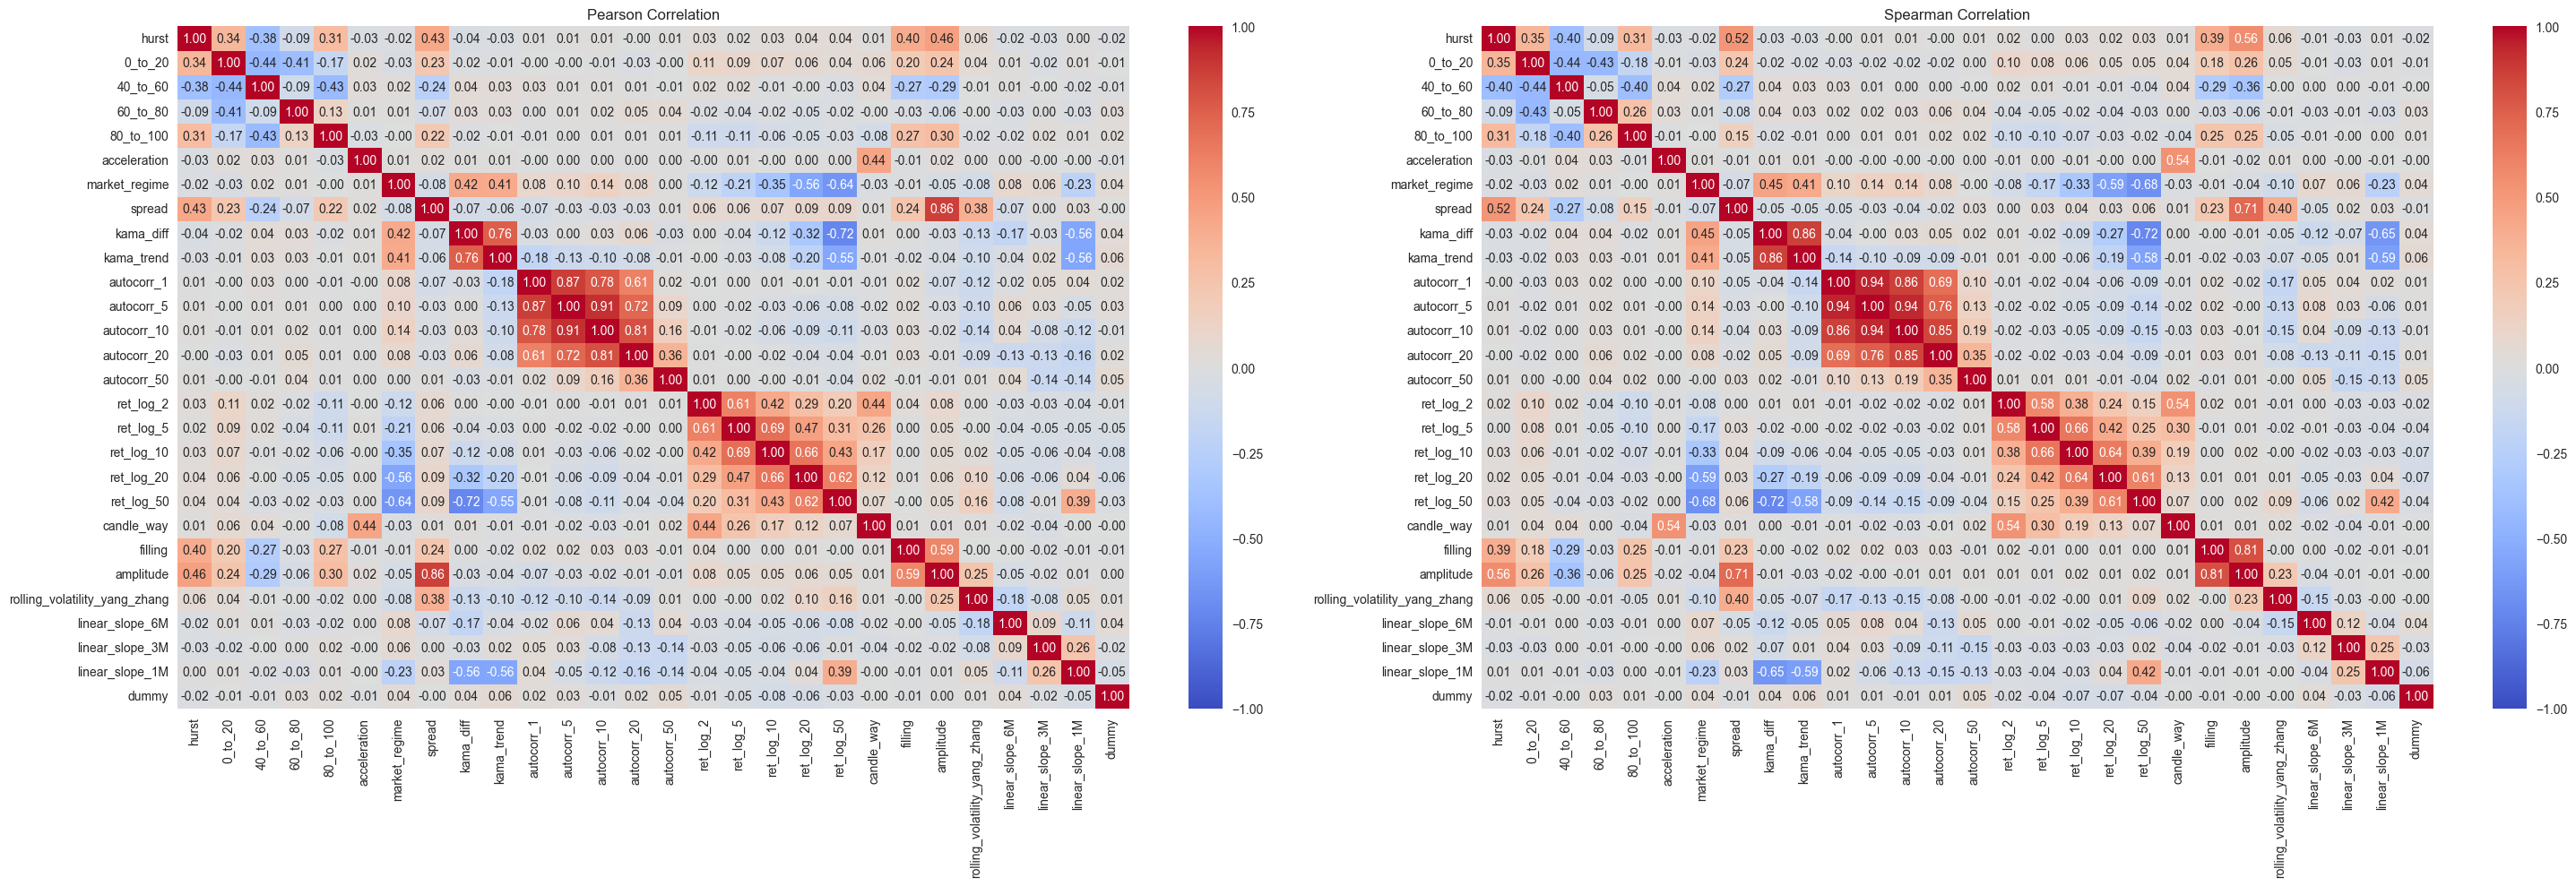

In [21]:
df_train = pd.concat((X_train_sc_df[vif_results_clean.index], y_train), axis=1)
correlation_graphs(df_train)

<br>

### 4.4. MUTUAL INFORMATION

**Mutual Information (MI)** is a metric that measures the **dependency** between two variables. Unlike correlation, it can capture both **linear** and **non-linear relationships**, making it a versatile tool for feature selection.  

The value of MI ranges from **0 to infinity**:
- A value of **0** means the two variables are **independent**.
- Higher values indicate a stronger **dependency** between the variables.  

In finance, where relationships between variables are often **non-linear** and complex, MI can provide valuable insights. However, keep in mind that MI only measures **statistical dependency** and does not imply **causation**. As always, use your **critical thinking** to interpret the results correctly.


In [24]:
# For a continous variable (regression)
#mi_scores = mutual_info_regression(X, y)

# For a dummy variable (classification)
mi_scores = mutual_info_classif(X_train_sc_df[vif_results_clean.index], y_train)
mi_df = pd.DataFrame({'Feature': X_train_sc_df[vif_results_clean.index].columns, 'Mutual Information': mi_scores}).sort_values(by='Mutual Information', ascending=False)
mi_df = mi_df.set_index("Feature")


# Summarize the info
linear_correlation_target = df_train.corr()["dummy"]*100
linear_correlation_target.name = "lr_dummy"

nonlinear_correlation_target = df_train.corr(method="spearman")["dummy"]*100
nonlinear_correlation_target.name = "nlr_dummy"

df_mi_vif = pd.concat((vif_results_clean, mi_df, linear_correlation_target, nonlinear_correlation_target), axis=1).dropna()
df_mi_vif.sort_values("Mutual Information", ascending=False).dropna()

,VIF,Mutual Information,lr_dummy,nlr_dummy
linear_slope_6M,1.47,0.080784,3.547389,3.988319
rolling_volatility_yang_zhang,1.37,0.043908,0.910948,-0.152520
autocorr_20,4.11,0.038784,1.588617,1.250498
autocorr_10,8.98,0.035120,-1.398750,-1.052475
ret_log_10,2.73,0.029032,-7.709922,-6.666665
autocorr_1,4.86,0.026298,2.162062,1.043775
autocorr_5,10.47,0.024336,2.548848,0.679682
market_regime,2.05,0.021445,4.417018,4.417018
ret_log_20,2.71,0.017908,-5.984239,-6.718211
kama_diff,4.85,0.016598,3.669718,4.250630


In [25]:
df_filtered = df_mi_vif[
    (df_mi_vif['Mutual Information'] > 0.01) |
    (df_mi_vif['lr_dummy'].abs() > 10) |
    (df_mi_vif['nlr_dummy'].abs() > 10)
]

# Afficher le résultat
df_filtered

,VIF,Mutual Information,lr_dummy,nlr_dummy
hurst,1.62,0.015064,-1.899385,-1.928563
market_regime,2.05,0.021445,4.417018,4.417018
kama_diff,4.85,0.016598,3.669718,4.250630
autocorr_1,4.86,0.026298,2.162062,1.043775
autocorr_5,10.47,0.024336,2.548848,0.679682
autocorr_10,8.98,0.035120,-1.398750,-1.052475
autocorr_20,4.11,0.038784,1.588617,1.250498
autocorr_50,1.35,0.012286,4.928804,5.106314
ret_log_10,2.73,0.029032,-7.709922,-6.666665
ret_log_20,2.71,0.017908,-5.984239,-6.718211


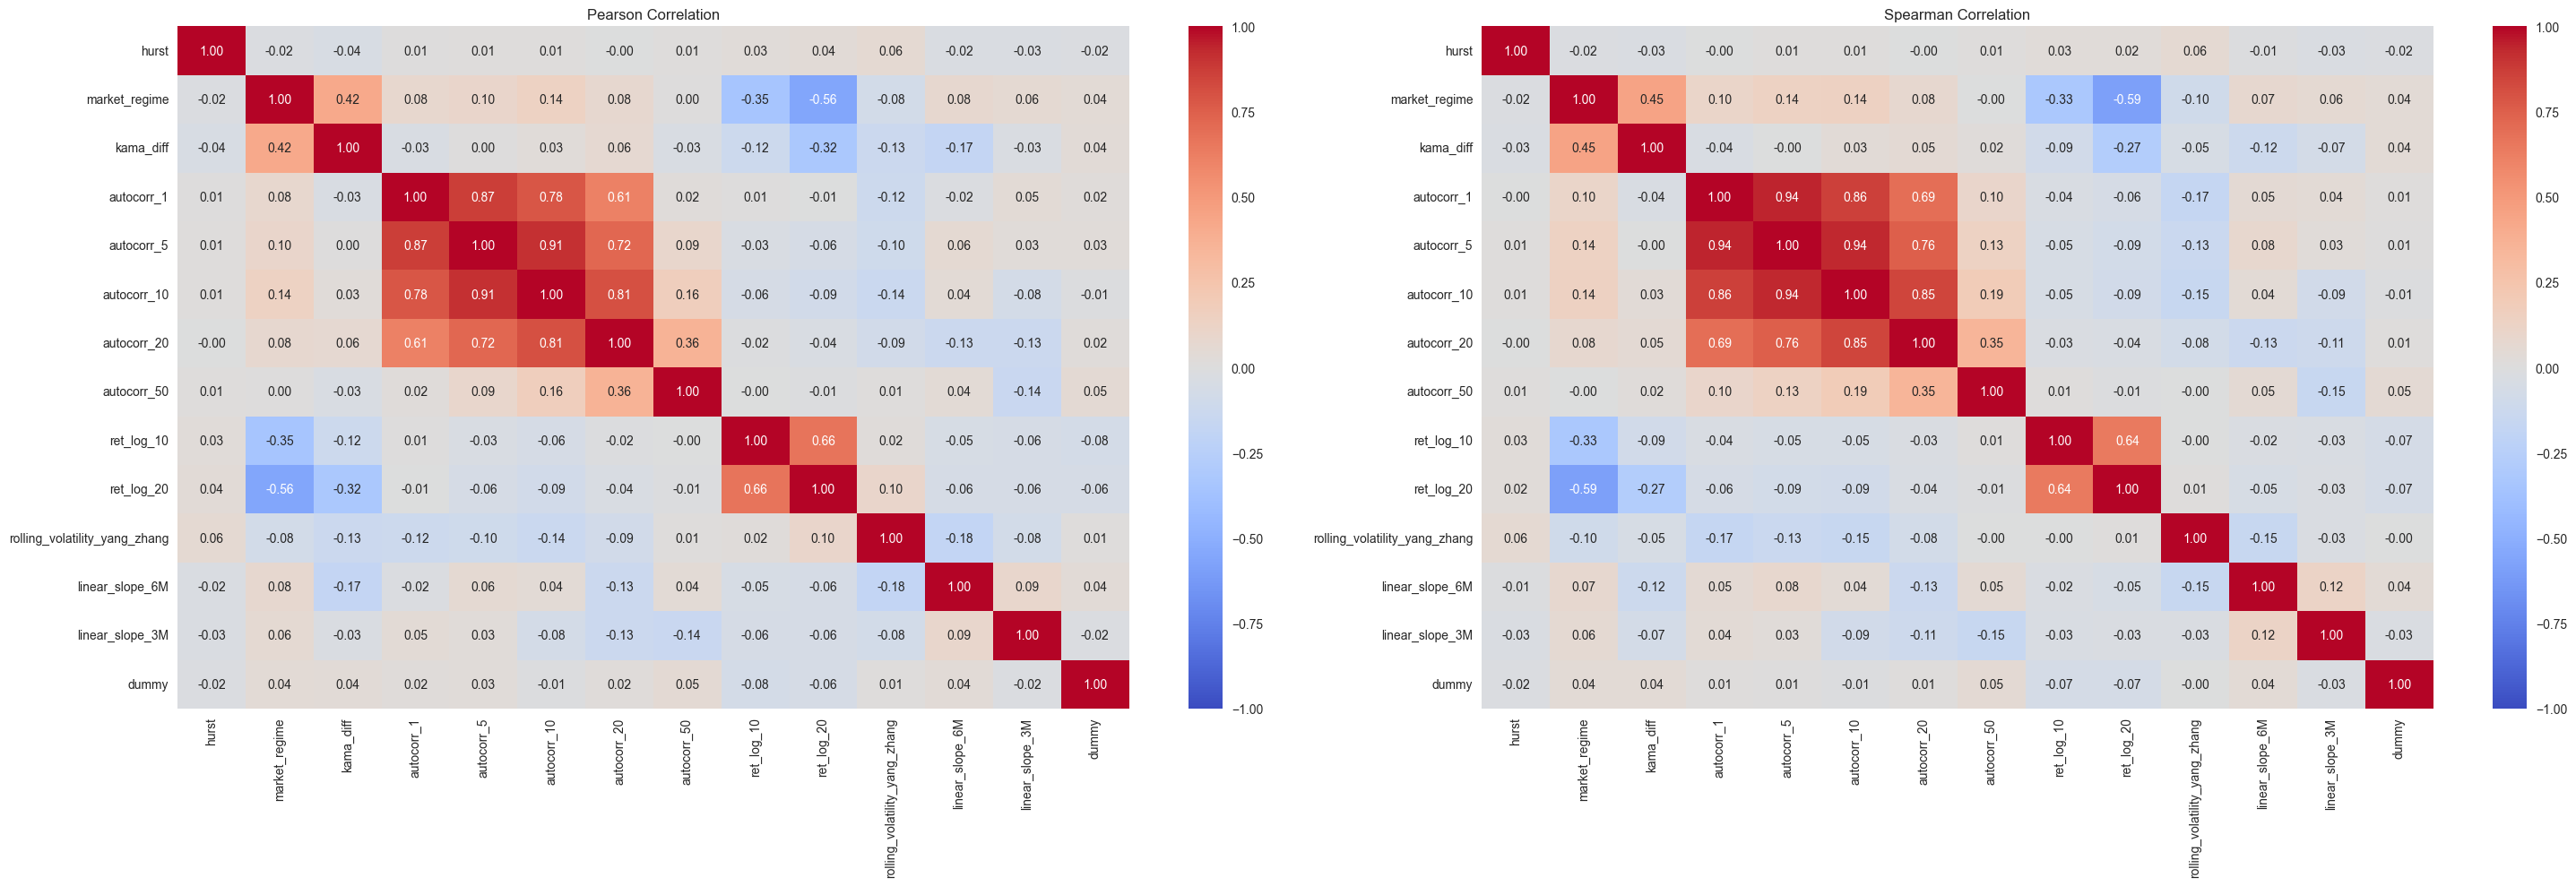

In [26]:
df_train_bis = pd.concat((X_train_sc_df[df_filtered.index], y_train), axis=1)
correlation_graphs(df_train_bis)

The removal of variables here is slightly subjective, as it involves addressing high correlations (above 60%) between features.

- **First dilemma: `market_regime` vs. `ret_log_20`**  
  Which one should be kept? This depends on the model being used. For example, with Random Forest, `market_regime` might be preferable, while for SVM, `ret_log_20` could be a better choice. In this case, I will retain `market_regime` because `ret_log_20`is too correlated with `ret_log_10`. 

- **Highly correlated features: `auto_corr_1`, `auto_corr_5`, `auto_corr_10`, and `auto_corr_20`**  
  These features show significant correlations among themselves. After a subjective analysis and considering their relationships with the target variable, I have decided to remove  `auto_corr_20`.

In [27]:
df_filtered.index

Index(['hurst', 'market_regime', 'kama_diff', 'autocorr_1', 'autocorr_5',
       'autocorr_10', 'autocorr_20', 'autocorr_50', 'ret_log_10', 'ret_log_20',
       'rolling_volatility_yang_zhang', 'linear_slope_6M', 'linear_slope_3M'],
      dtype='object')

<br>

### 4.5. A LAST VERIFICATION

In [32]:
list_X = ['hurst', 'market_regime', 'kama_diff', 'autocorr_20', 'autocorr_50', 'ret_log_10',
       'rolling_volatility_yang_zhang', 'linear_slope_6M', 'linear_slope_3M']
col_y = "dummy"

df_clean = df[list_X + [col_y]].dropna()

X_train_final = df_clean.iloc[0:3_000,:][list_X]
y_train = df_clean.iloc[0:3_000,:][col_y]

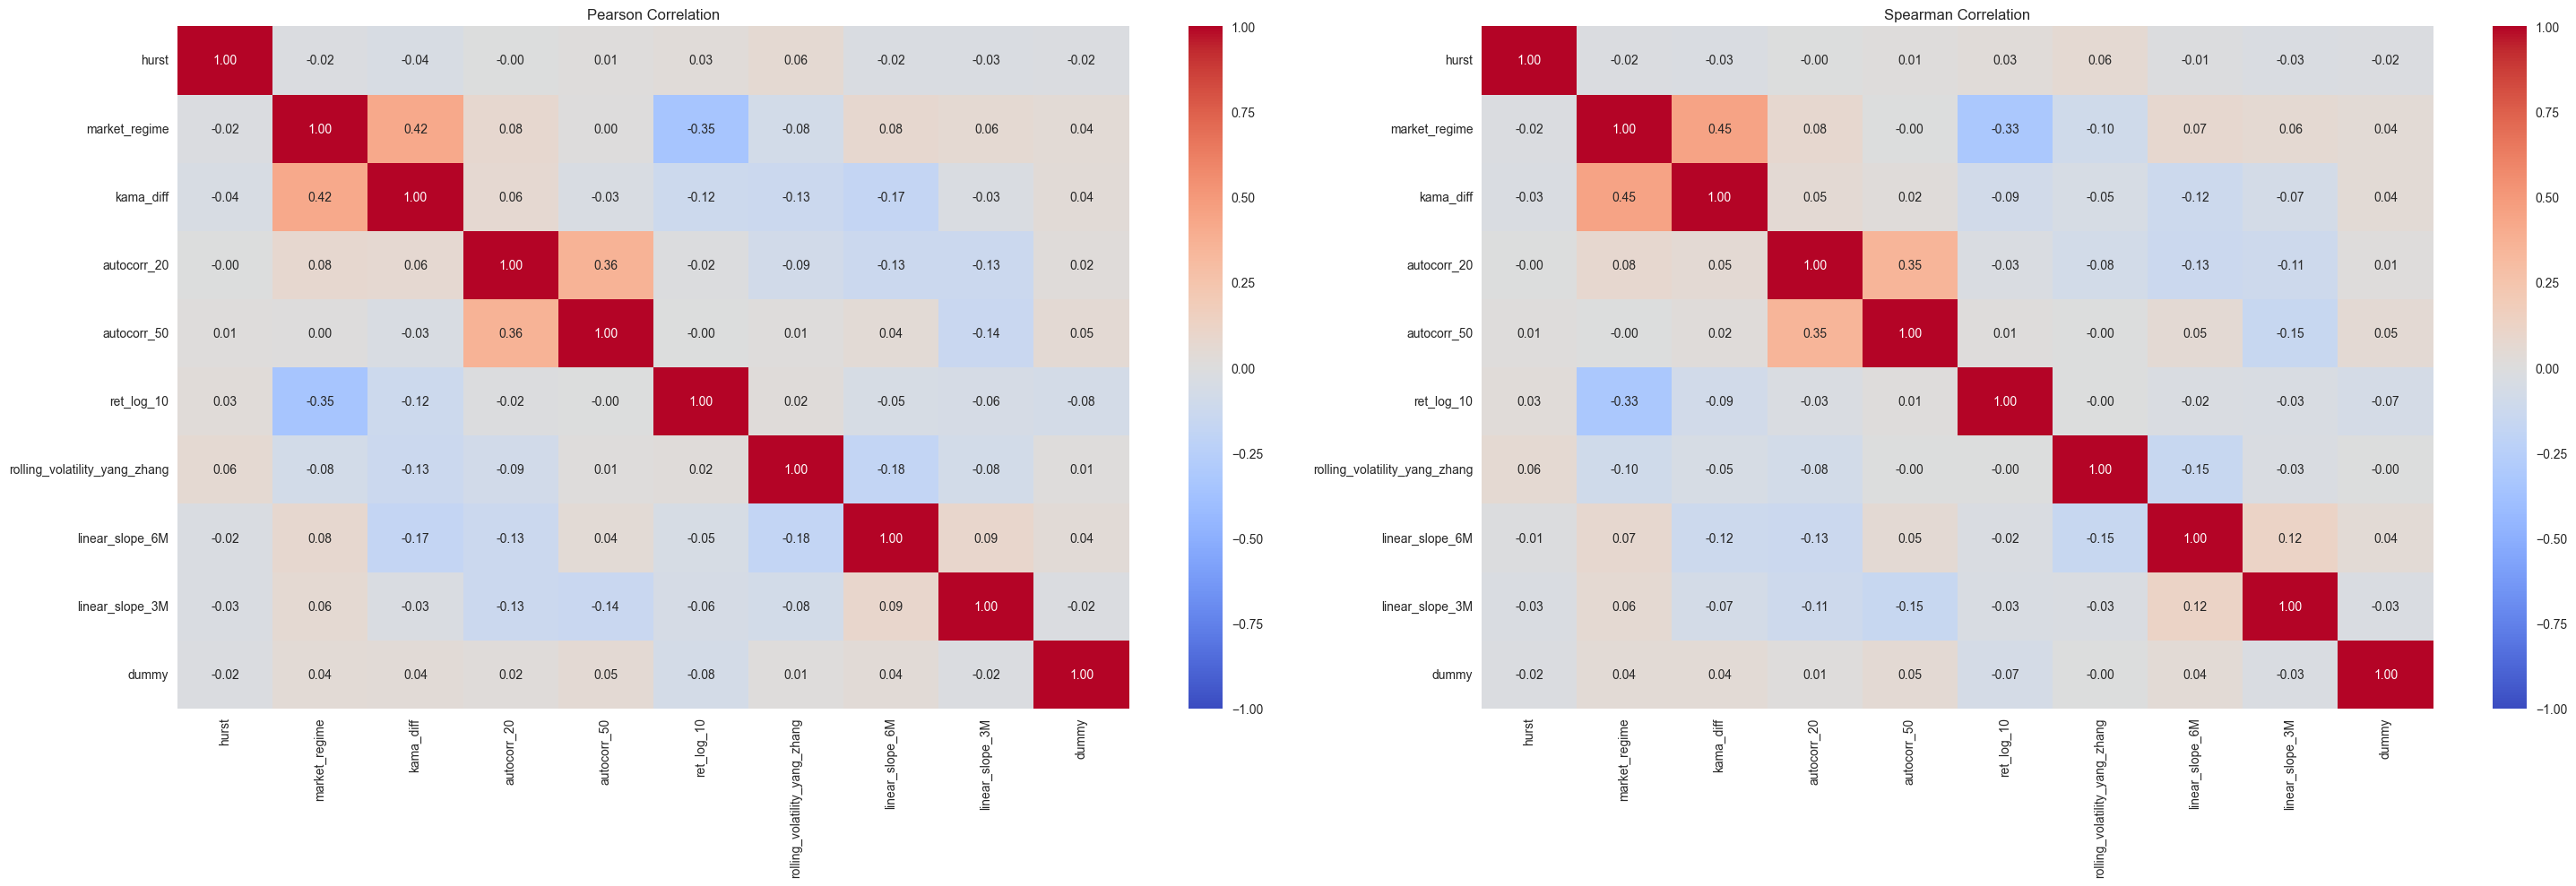

In [33]:
df_train_final = pd.concat((X_train_final, y_train), axis=1)
correlation_graphs(df_train_final)

<br> 

### 4.6. RECAP OF THE PROCESS

![](IMAGES/chartflow.png)